In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [101]:
img1 = cv2.imread('pa2.jpg')
img1 = cv2.resize(img1,(800,800))
#img1 = cv2.resize(img1, (0,0), fx=0.2,fy=0.2)
img2 = cv2.imread('pa1.jpg')
img2 = cv2.resize(img2,(800,800))
#img2 = cv2.resize(img2, (0,0), fx=0.2,fy=0.2)

In [102]:
sift = cv2.SIFT_create()

kp1,des1 = sift.detectAndCompute(img1,None)
simg1=cv2.drawKeypoints(img1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

kp2,des2 = sift.detectAndCompute(img2,None)
simg2=cv2.drawKeypoints(img2,kp2,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [103]:
print(len(kp1))
print(len(kp2))
print(des1.shape)
print(des2.shape)

2415
2332
(2415, 128)
(2332, 128)


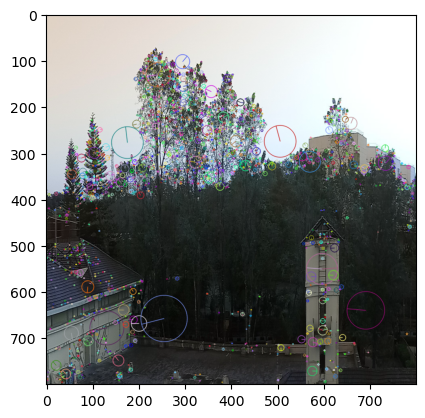

In [104]:
plt.imshow(simg1)

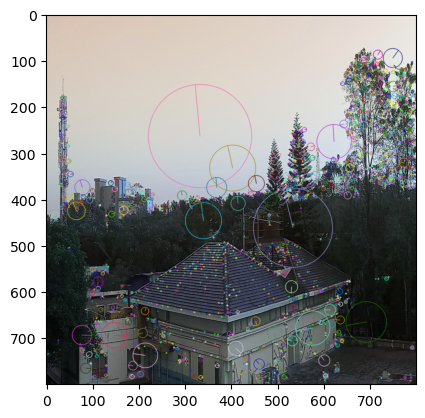

In [105]:
plt.imshow(simg2)

In [106]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

In [107]:
good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append([m])

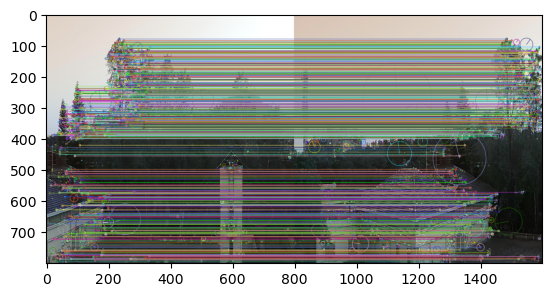

In [108]:
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

In [109]:
src_pts = np.float32([ kp1[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)
    
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

In [111]:
img1 = cv2.imread('pa2.jpg',0)
img1 = cv2.resize(img1,(800,800))
#img1 = cv2.resize(img1, (0,0), fx=0.2,fy=0.2)
img2 = cv2.imread('pa1.jpg',0)
img2 = cv2.resize(img2,(800,800))
#img2 = cv2.resize(img2, (0,0), fx=0.2,fy=0.2)

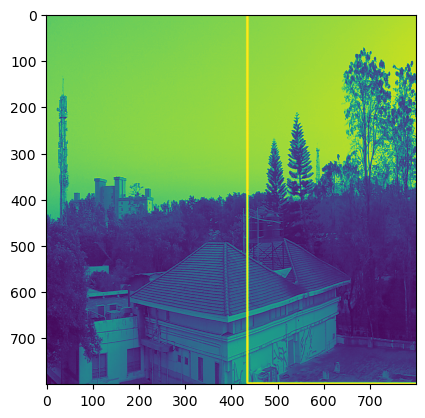

In [112]:
h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
plt.imshow(img2)
plt.show()

In [114]:
img1 = cv2.imread('pa1.jpg')
img1 = cv2.resize(img1,(800,800))
#img1 = cv2.resize(img1, (0,0), fx=0.2,fy=0.2)
img2 = cv2.imread('pa2.jpg')
img2 = cv2.resize(img2,(800,800))
#img2 = cv2.resize(img2, (0,0), fx=0.2,fy=0.2)

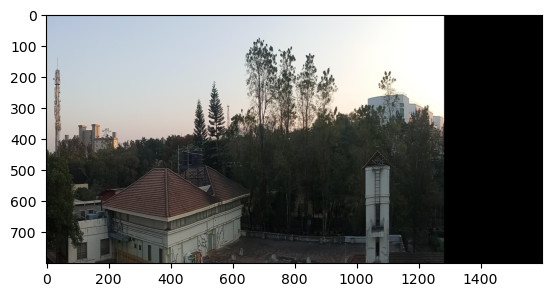

In [115]:
img1_warp = cv2.warpPerspective(img2, M, (img1.shape[1] + img2.shape[1], max(img1.shape[0],img2.shape[0])))
plt.imshow(img1_warp)
img1_warp[0:img1.shape[0], 0:img1.shape[1]] = img1
img1_warp = cv2.cvtColor(img1_warp, cv2.COLOR_BGR2RGB)
plt.imshow(img1_warp)

In [116]:
def trim(frame):
    #crop top
    if not np.sum(frame[0]):
         frame = trim(frame[1:])
    #crop bottom
    if not np.sum(frame[-1]):
         frame = trim(frame[:-1])
    #crop left
    if not np.sum(frame[:,0]):
         frame = trim(frame[:,1:]) 
    #crop right
    if not np.sum(frame[:,-1]):
         frame = trim(frame[:,:-1])    
    return frame

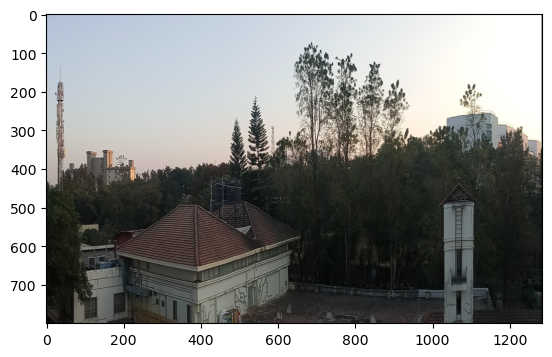

In [117]:
plt.imshow(trim(img1_warp))

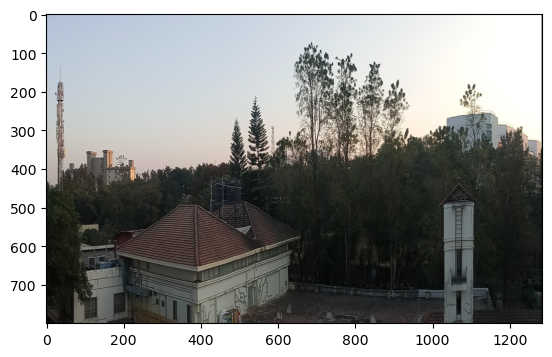

In [118]:
img1_warp = trim(img1_warp)
plt.imshow(img1_warp)

In [119]:
img1_warp = cv2.cvtColor(img1_warp, cv2.COLOR_BGR2RGB)
cv2.imwrite('r.jpg',img1_warp)

True

In [139]:
img1 = cv2.imread('pa3.jpg')
img1 = cv2.resize(img1,(800,800))
#img1 = cv2.resize(img1, (0,0), fx=0.2,fy=0.2)
img2 = cv2.imread('r.jpg')
img2 = cv2.resize(img2,(800,800))
#img2 = cv2.resize(img2, (0,0), fx=0.2,fy=0.2)

In [140]:
sift = cv2.SIFT_create()

kp1,des1 = sift.detectAndCompute(img1,None)
simg1=cv2.drawKeypoints(img1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

kp2,des2 = sift.detectAndCompute(img2,None)
simg2=cv2.drawKeypoints(img2,kp2,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [141]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

In [142]:
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

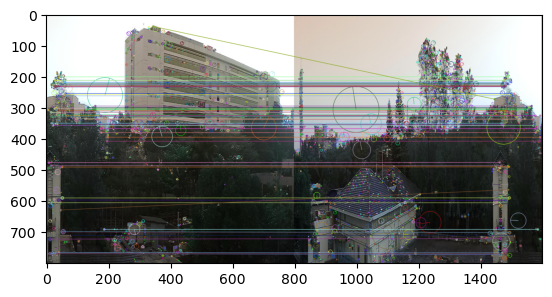

In [143]:
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

In [144]:
src_pts = np.float32([ kp1[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)
    
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

In [145]:
img1 = cv2.imread('pa3.jpg',0)
img1 = cv2.resize(img1,(800,800))
#img1 = cv2.resize(img1, (0,0), fx=0.2,fy=0.2)
img2 = cv2.imread('r.jpg',0)
img2 = cv2.resize(img2,(800,800))
#img2 = cv2.resize(img2, (0,0), fx=0.2,fy=0.2)

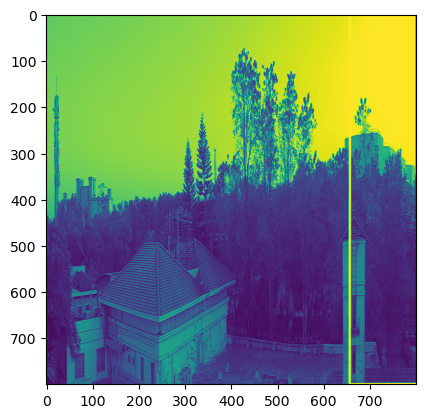

In [146]:
h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
plt.imshow(img2)
plt.show()

In [147]:
img1 = cv2.imread('r.jpg')
img1 = cv2.resize(img1,(800,800))
#img1 = cv2.resize(img1, (0,0), fx=0.2,fy=0.2)
img2 = cv2.imread('pa3.jpg')
img2 = cv2.resize(img2,(800,800))
#img2 = cv2.resize(img2, (0,0), fx=0.2,fy=0.2)

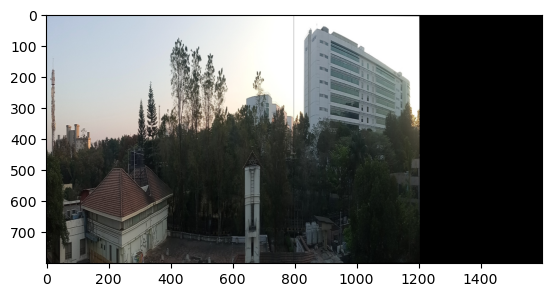

In [148]:
img1_warp = cv2.warpPerspective(img2, M, (img1.shape[1] + img2.shape[1], max(img1.shape[0],img2.shape[0])))
plt.imshow(img1_warp)
img1_warp[0:img1.shape[0], 0:img1.shape[1]] = img1
img1_warp = cv2.cvtColor(img1_warp, cv2.COLOR_BGR2RGB)
plt.imshow(img1_warp)

In [150]:
img1 = trim(img1_warp)
cv2.imwrite('f.jpg',img1)

True

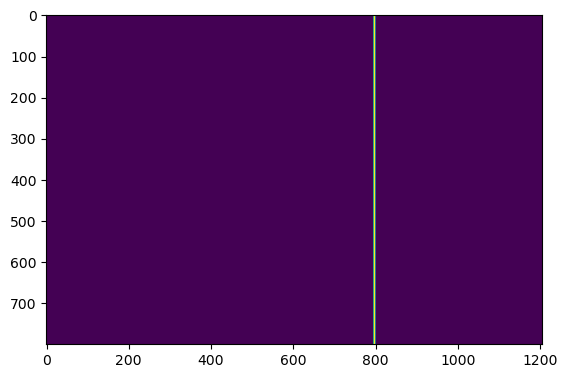

In [151]:
height = img1.shape[0]
width = img1.shape[1]
polygon = np.array([[(796, height),(800, height),(800,0), (796,0)]])
mask = np.zeros_like(img1)
mask = cv2.fillPoly(mask,polygon,255)
mask2 = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
plt.imshow(mask2)

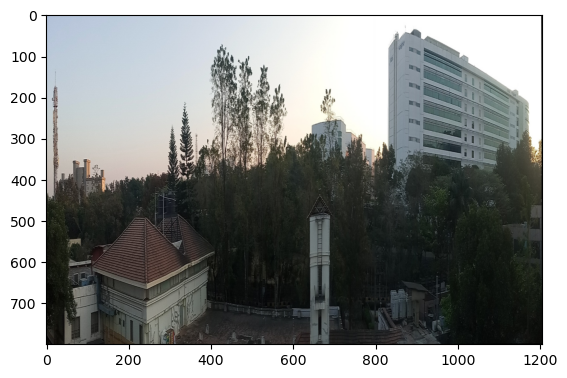

In [152]:
dst = cv2.inpaint(img1,mask2,3,cv2.INPAINT_TELEA)
plt.imshow(dst)

In [153]:
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
cv2.imwrite('f_result.jpg',dst)

True